In [75]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

# Feature Engineering

## Importing & Profiling the Data
Import the file, "06_StockData.csv", and save it in a variable called `df`. Then, do some initial data profiling of the data based on what we covered the last 2 classes. 

In [76]:
import pandas as pd
df = pd.read_csv("06_StockData.csv")
df

,ticker symbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,"Sit conubia diam vivamus a arcu dapibus in at nec, nisi amet,"
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur, mauris. In, nulla sit ad himenaeos"
2,aapl,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at"
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentesque, co"
4,aapl,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. Sociis"
...,...,...,...,...,...,...,...,...,...
7855,wmt,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis quam himenaeos. A"
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper eget vitae molli
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis facilisis imperdiet ut. Fac
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit lacus maximus


What are the data types?

In [77]:
df.dtypes

ticker symbol     object
date              object
stockShares      float64
stockPrice       float64
revenue          float64
cogs             float64
quantity         float64
temperature      float64
statement         object
dtype: object

Are there missing values?

In [78]:
df.isna().sum()
# Nope, no missing values

ticker symbol    0
date             0
stockShares      0
stockPrice       0
revenue          0
cogs             0
quantity         0
temperature      0
statement        0
dtype: int64

What are the summary statistics for the quantitative variables? What can you say about the variables based on the summary?

In [79]:
df.describe()
# They seem to be centered around the mean and 50% mid, so they are probably normally distributed


,stockShares,stockPrice,revenue,cogs,quantity,temperature
count,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000
mean,978.156058,1312.100263,355.452999,297.794156,26.615955,-0.343343
std,98.516888,541.486311,69.957051,62.245534,19.520975,17.149851
min,809.784278,476.949801,179.316987,131.986703,4.213687,-21.840318
25%,924.292173,1003.550696,305.754637,255.680705,14.187851,-17.459061
50%,976.091229,1190.045157,346.505519,294.783712,21.066767,-11.233978
75%,1038.403035,1434.035044,396.804068,337.477349,32.286660,17.308275
max,1184.148135,12099.338748,619.630921,513.715137,198.253185,21.587124


Create histograms for "stockShares", "stockPrice", and "temperature". Try using the parameter `bins=` to set the number of bins for your histogram (e.g., `bins=30`, `bins=40`, etc.).

<Axes: ylabel='Frequency'>

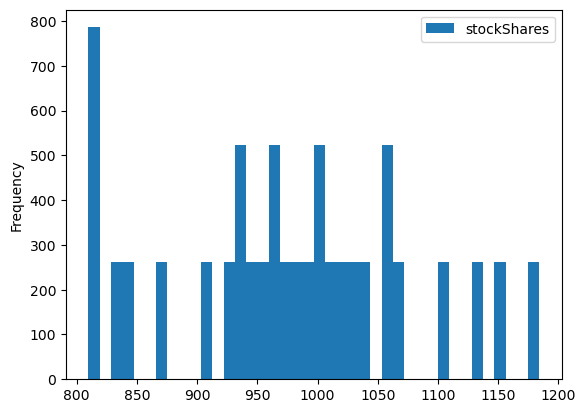

In [80]:
# Histogram for stockShares:
df.plot.hist(y = "stockShares", bins = 40)

array([[<Axes: title={'center': 'stockPrice'}>]], dtype=object)

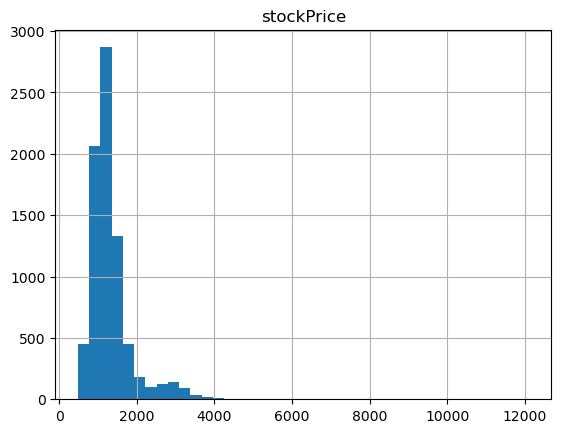

In [81]:
# Histogram for stockPrice:
df.hist(column = "stockPrice", bins = 40)

array([[<Axes: title={'center': 'temperature'}>]], dtype=object)

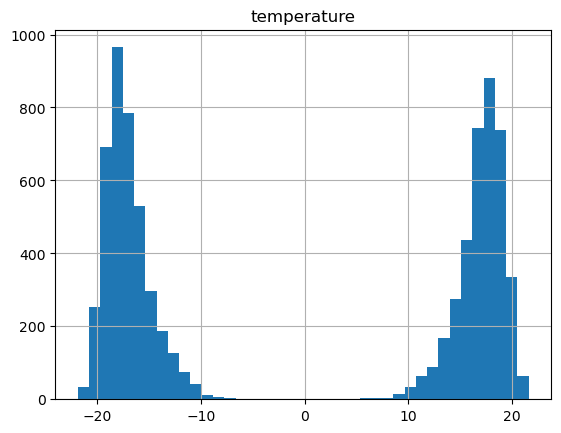

In [82]:
# Histogram for temperature:
df.hist(column = "temperature", bins = 40)

Can you make any conclusions about these variables from the histograms?

rf:
* They all appear to be mostly normal distributions, with the exception of temperature which, would probably be normal distribution if we took the absolute value.
* stock price is skewed to the left / lower values



How many categories are there for "ticker symbol" and what are the categories? Do you notice anything strange about this variable?

In [83]:
df["ticker symbol"].nunique()
df["ticker symbol"].unique()


60

array(['AAPL', 'aapl', 'amgn', 'AMGN', 'axp', 'AXP', 'ba', 'BA', 'cat',
       'CAT', 'CRM', 'crm', 'csco', 'CSCO', 'CVX', 'cvx', 'dis', 'DIS',
       'DOW', 'dow', 'gs', 'GS', 'HD', 'hd', 'hon', 'HON', 'ibm', 'IBM',
       'INTC', 'intc', 'JNJ', 'jnj', 'JPM', 'jpm', 'KO', 'ko', 'MCD',
       'mcd', 'mmm', 'MMM', 'mrk', 'MRK', 'msft', 'MSFT', 'nke', 'NKE',
       'PG', 'pg', 'TRV', 'trv', 'unh', 'UNH', 'v', 'V', 'vz', 'VZ',
       'WBA', 'wba', 'wmt', 'WMT'], dtype=object)

## Renaming a Column

That space in the column name "ticker symbol" is really going to get annoying. Let's change it:

In [84]:
df.rename(columns = {"ticker symbol" : "tickerSymbol"})

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,"Sit conubia diam vivamus a arcu dapibus in at nec, nisi amet,"
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur, mauris. In, nulla sit ad himenaeos"
2,aapl,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at"
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentesque, co"
4,aapl,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. Sociis"
...,...,...,...,...,...,...,...,...,...
7855,wmt,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis quam himenaeos. A"
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper eget vitae molli
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis facilisis imperdiet ut. Fac
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit lacus maximus


Quick python syntax side note: the command above includes a format that we've not seen before... `{"ticker symbol" : "ticker_symbol"}`. The braces (`{}`) define a *dictionary* in python, which associates one value with another. In this case, we are associating the old column name to the new column name.

Now check the data types again:

In [85]:
df.dtypes

ticker symbol     object
date              object
stockShares      float64
stockPrice       float64
revenue          float64
cogs             float64
quantity         float64
temperature      float64
statement         object
dtype: object

The column reverted back to the original name. Why?

Re-run the `.rename()` command below, this time saving your results and check the data types to make sure the change took effect:

In [86]:
df = df.rename(columns = {"ticker symbol" : "tickerSymbol"})

## Adding new columns

Remember how we created variables in class 01? We used an assignment statement, like the following:

In [87]:
x = 42

You do the same thing to add a new column to your DataFrame...the variable in this case being the name of the new column:

In [88]:
df["Junk"] = 28
df

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,Junk
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,"Sit conubia diam vivamus a arcu dapibus in at nec, nisi amet,",28
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur, mauris. In, nulla sit ad himenaeos",28
2,aapl,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at",28
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentesque, co",28
4,aapl,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. Sociis",28
...,...,...,...,...,...,...,...,...,...,...
7855,wmt,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis quam himenaeos. A",28
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper eget vitae molli,28
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis facilisis imperdiet ut. Fac,28
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit lacus maximus,28


Now, you try it. Add a new column called "marketValue" that is calculated as "stockShares" * "stockPrice"

Then look at `df` to ensure the change took effect.

In [89]:
df

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,Junk
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,"Sit conubia diam vivamus a arcu dapibus in at nec, nisi amet,",28
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur, mauris. In, nulla sit ad himenaeos",28
2,aapl,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at",28
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentesque, co",28
4,aapl,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. Sociis",28
...,...,...,...,...,...,...,...,...,...,...
7855,wmt,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis quam himenaeos. A",28
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper eget vitae molli,28
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis facilisis imperdiet ut. Fac,28
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit lacus maximus,28


In [90]:
df["marketValue"] = df["stockShares"] * df["stockPrice"]
df

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,Junk,marketValue
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,"Sit conubia diam vivamus a arcu dapibus in at nec, nisi amet,",28,1.045749e+06
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur, mauris. In, nulla sit ad himenaeos",28,1.388010e+06
2,aapl,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at",28,8.378791e+05
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentesque, co",28,9.083493e+05
4,aapl,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. Sociis",28,8.707004e+05
...,...,...,...,...,...,...,...,...,...,...,...
7855,wmt,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis quam himenaeos. A",28,1.072458e+06
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper eget vitae molli,28,1.049088e+06
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis facilisis imperdiet ut. Fac,28,1.174725e+06
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit lacus maximus,28,1.049870e+06


## Removing columns

Let's now get rid of that "Junk" column. To do this, use the `.drop()` method:

In [91]:
df = df.drop(columns = "Junk")
df

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,marketValue
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,"Sit conubia diam vivamus a arcu dapibus in at nec, nisi amet,",1.045749e+06
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur, mauris. In, nulla sit ad himenaeos",1.388010e+06
2,aapl,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at",8.378791e+05
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentesque, co",9.083493e+05
4,aapl,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. Sociis",8.707004e+05
...,...,...,...,...,...,...,...,...,...,...
7855,wmt,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis quam himenaeos. A",1.072458e+06
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper eget vitae molli,1.049088e+06
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis facilisis imperdiet ut. Fac,1.174725e+06
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit lacus maximus,1.049870e+06


## Changing Data

Remember the `tickerSymbol` column has a mix of upper- and lower-case ticker symbols:

In [92]:
df["tickerSymbol"].value_counts().sort_index()
df

tickerSymbol
AAPL    129
AMGN    144
AXP     136
BA      131
CAT     148
CRM     132
CSCO    126
CVX     123
DIS     135
DOW     146
GS      122
HD      124
HON     134
IBM     124
INTC    130
JNJ     132
JPM     124
KO      128
MCD     133
MMM     141
MRK     137
MSFT    129
NKE     134
PG      143
TRV     133
UNH     126
V       129
VZ      147
WBA     122
WMT     134
aapl    133
amgn    118
axp     126
ba      131
cat     114
crm     130
csco    136
cvx     139
dis     127
dow     116
gs      140
hd      138
hon     128
ibm     138
intc    132
jnj     130
jpm     138
ko      134
mcd     129
mmm     121
mrk     125
msft    133
nke     128
pg      119
trv     129
unh     136
v       133
vz      115
wba     140
wmt     128
Name: count, dtype: int64

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,marketValue
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,"Sit conubia diam vivamus a arcu dapibus in at nec, nisi amet,",1.045749e+06
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur, mauris. In, nulla sit ad himenaeos",1.388010e+06
2,aapl,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at",8.378791e+05
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentesque, co",9.083493e+05
4,aapl,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. Sociis",8.707004e+05
...,...,...,...,...,...,...,...,...,...,...
7855,wmt,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis quam himenaeos. A",1.072458e+06
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper eget vitae molli,1.049088e+06
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis facilisis imperdiet ut. Fac,1.174725e+06
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit lacus maximus,1.049870e+06


In python, you can change the case of a string using either `.str.upper()` or `.str.lower()`. Notice what happens when adding `.str.upper()` before the `.value_counts()` command:

In [93]:
df["tickerSymbol"].str.upper().value_counts().sort_index()


tickerSymbol
AAPL    262
AMGN    262
AXP     262
BA      262
CAT     262
CRM     262
CSCO    262
CVX     262
DIS     262
DOW     262
GS      262
HD      262
HON     262
IBM     262
INTC    262
JNJ     262
JPM     262
KO      262
MCD     262
MMM     262
MRK     262
MSFT    262
NKE     262
PG      262
TRV     262
UNH     262
V       262
VZ      262
WBA     262
WMT     262
Name: count, dtype: int64

Of course, that didn't change the actual values for that column:

In [94]:
df["tickerSymbol"]

0       AAPL
1       AAPL
2       aapl
3       AAPL
4       aapl
        ... 
7855     wmt
7856     WMT
7857     WMT
7858     WMT
7859     wmt
Name: tickerSymbol, Length: 7860, dtype: object

Using an assignment statement, change the "tickerSymbol" values to be all in upper-case and re-run the code in the previous cell to check that the changes worked:

In [95]:
df["tickerSymbol"] = df["tickerSymbol"].str.upper()
df

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,marketValue
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,"Sit conubia diam vivamus a arcu dapibus in at nec, nisi amet,",1.045749e+06
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur, mauris. In, nulla sit ad himenaeos",1.388010e+06
2,AAPL,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at",8.378791e+05
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentesque, co",9.083493e+05
4,AAPL,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. Sociis",8.707004e+05
...,...,...,...,...,...,...,...,...,...,...
7855,WMT,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis quam himenaeos. A",1.072458e+06
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper eget vitae molli,1.049088e+06
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis facilisis imperdiet ut. Fac,1.174725e+06
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit lacus maximus,1.049870e+06


### Using `.loc[]` to Change Data

What if there are only specific values we want to change?

Let's take another look at the distribution of the price data:

count     7860.000000
mean      1312.100263
std        541.486311
min        476.949801
25%       1003.550696
50%       1190.045157
75%       1434.035044
max      12099.338748
Name: stockPrice, dtype: float64

<Axes: ylabel='Frequency'>

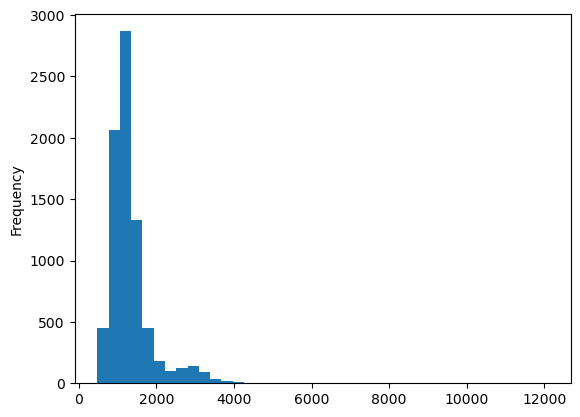

In [96]:
df["stockPrice"].describe()
df["stockPrice"].plot.hist(bins = 40)

What are the clues that we have one or more outliers?

Once we've identified a value (such as a potential outlier) to change, how do we change it?

First, lets locate the row(s) with outliers based on some logical condition. We do this with `.loc[]`. 

In [97]:
# Locating rows based on logical conditions:
df.loc[df["tickerSymbol"] == "AAPL"]

# Locating rows and column:
df.loc[df["tickerSymbol"] == "AAPL", "revenue"]

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,marketValue
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,"Sit conubia diam vivamus a arcu dapibus in at nec, nisi amet,",1.045749e+06
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur, mauris. In, nulla sit ad himenaeos",1.388010e+06
2,AAPL,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at",8.378791e+05
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentesque, co",9.083493e+05
4,AAPL,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. Sociis",8.707004e+05
...,...,...,...,...,...,...,...,...,...,...
257,AAPL,2020-07-06,866.883293,1105.874354,334.707321,349.519148,33.822119,17.721060,"Elit lacus ac, facilisi sapien massa dictum inceptos mol",9.586640e+05
258,AAPL,2020-11-02,866.883293,1486.758422,345.893151,268.583625,16.020092,-17.459382,"A sollicitudin, luctus congue in dui felis. Ac sed proin ut quis ac. In era",1.288846e+06
259,AAPL,2020-10-30,866.883293,1305.578564,360.275193,318.642085,26.250607,17.106928,"Tellus, faucibus tortor feugiat magna porttitor condimentum sceler",1.131784e+06
260,AAPL,2020-08-07,866.883293,1236.435485,324.704306,303.197308,22.578481,-17.879048,"Amet neque ut efficitur arcu tempor purus suspendisse magnis, p",1.071845e+06


0      295.482953
1      332.422321
2      290.358237
3      295.507002
4      263.669375
          ...    
257    334.707321
258    345.893151
259    360.275193
260    324.704306
261    283.793792
Name: revenue, Length: 262, dtype: float64

Remember, the general structure of the `.loc[]` command is:
```
dataFrame.loc[rowCriteria, columnCriteria]
```

Now, you try...locate any row with a "stockPrice" greater than 10000 and display only the "stockPrice" column:

In [98]:
df.loc[df["stockPrice"] > 10000, "stockPrice"]

3446    12099.338748
Name: stockPrice, dtype: float64

Now that we have located the actual outlier value, we can change it with an assignment statement. Run the code below to change it to 10001:

In [99]:
df.loc[df["stockPrice"] > 10000, "stockPrice"] = 10001
df.loc[df["stockPrice"] > 10000, "stockPrice"]

3446    10001.0
Name: stockPrice, dtype: float64

Of course, we don't want to make the outlier value even worse. Since it's likely a value greater than 10000 is an error, let's change it to `NaN` so that it doesn't impact our analysis. We can do this with `.nan` from the `numpy` module. 

Import `numpy` and change the outlier value to `NaN` as follows:

In [100]:
import numpy as np
df.loc[df["stockPrice"] > 10000, "stockPrice"] = np.nan

Notice there is now a missing value for "stockPrice":

In [101]:
df.isna().sum()

tickerSymbol    0
date            0
stockShares     0
stockPrice      1
revenue         0
cogs            0
quantity        0
temperature     0
statement       0
marketValue     0
dtype: int64

Run the following code to see the impact this has on our summary stats and histogram:

count    7859.000000
mean     1310.727666
std       527.668874
min       476.949801
25%      1003.535640
50%      1189.870025
75%      1433.993986
max      4526.030051
Name: stockPrice, dtype: float64

<Axes: ylabel='Frequency'>

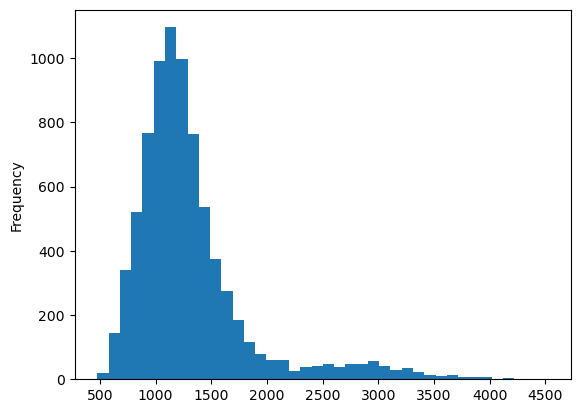

In [102]:
df["stockPrice"].describe()
df["stockPrice"].plot.hist(bins = 40)

We're not done yet. Remember that python is sequential and we created the "marketValue" column *before* changing the outlier value. Here, we can see that the "marketValue" didn't change for this row:

In [103]:
# I'm using df.index to refer to the specific row number from the DataFrame:
df.loc[df.index == 3446]

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,marketValue
3446,IBM,2020-04-01,934.385355,NaN,418.937115,370.897122,42.391047,15.420366,"Ante accumsan suspendisse augue. Neque, urna vitae et mattis! Turp",1.130544e+07


Re-run the following code cell to re-calculate "marketValue" and notice that we now have a missing value for that column (because python can't do math with a missing value):

In [104]:
df["marketValue"] = df["stockShares"] * df["stockPrice"]
df.loc[df.index == 3446]
df.isna().sum()

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,marketValue
3446,IBM,2020-04-01,934.385355,NaN,418.937115,370.897122,42.391047,15.420366,"Ante accumsan suspendisse augue. Neque, urna vitae et mattis! Turp",NaN


tickerSymbol    0
date            0
stockShares     0
stockPrice      1
revenue         0
cogs            0
quantity        0
temperature     0
statement       0
marketValue     1
dtype: int64

## Handling Dates

Notice the "date" column has been read in as an "object", which means that python will treat it as a categorical variable. See if you can figure out how many unique dates there are in this data frame:

In [105]:
df["date"].describe

<bound method NDFrame.describe of 0       2020-01-22
1       2020-03-13
2       2020-03-26
3       2020-03-30
4       2020-03-27
           ...    
7855    2020-10-06
7856    2020-10-05
7857    2020-10-07
7858    2020-10-20
7859    2020-12-10
Name: date, Length: 7860, dtype: object>

Usually we don't put date variables directly into our models because it would require n-1 dummy variables to handle each unique date "category". Instead, it's more useful to create a variable summarizing the dates, e.g., "weekday" or "month".

However, to do this we first must change the data type to "datetime." We can do this using the `.to_datetime()` function in `pandas`.

In [106]:
pd.to_datetime(df["date"])

0      2020-01-22
1      2020-03-13
2      2020-03-26
3      2020-03-30
4      2020-03-27
          ...    
7855   2020-10-06
7856   2020-10-05
7857   2020-10-07
7858   2020-10-20
7859   2020-12-10
Name: date, Length: 7860, dtype: datetime64[ns]

This just displays the dates as a "datetime" data type. Now, create a new variable called "date2" that changes "date" into a "datetime" object:

In [107]:
df["date2"] = pd.to_datetime(df["date"])

Notice, we didn't write over the original "date" variable in case we want to use the original data in the future.

Now, we can use datetime functions to summarize the dates. Run the code cell below to create a new column called "weekday":

In [108]:
df["weekday"] = df["date2"].dt.day_name()

Now see if you can figure out how to modify the above code to create a new variable called "month" with the date's month:

In [109]:
df["month"] = df["date2"].dt.month_name()

In [110]:
df

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,marketValue,date2,weekday,month
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,"Sit conubia diam vivamus a arcu dapibus in at nec, nisi amet,",1.045749e+06,2020-01-22,Wednesday,January
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur, mauris. In, nulla sit ad himenaeos",1.388010e+06,2020-03-13,Friday,March
2,AAPL,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at",8.378791e+05,2020-03-26,Thursday,March
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentesque, co",9.083493e+05,2020-03-30,Monday,March
4,AAPL,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. Sociis",8.707004e+05,2020-03-27,Friday,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7855,WMT,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis quam himenaeos. A",1.072458e+06,2020-10-06,Tuesday,October
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper eget vitae molli,1.049088e+06,2020-10-05,Monday,October
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis facilisis imperdiet ut. Fac,1.174725e+06,2020-10-07,Wednesday,October
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit lacus maximus,1.049870e+06,2020-10-20,Tuesday,October


## Transforming Features

### Squaring Variables
Plot temperature (x-axis) vs. revenue (y-axis):

<Axes: xlabel='temperature', ylabel='revenue'>

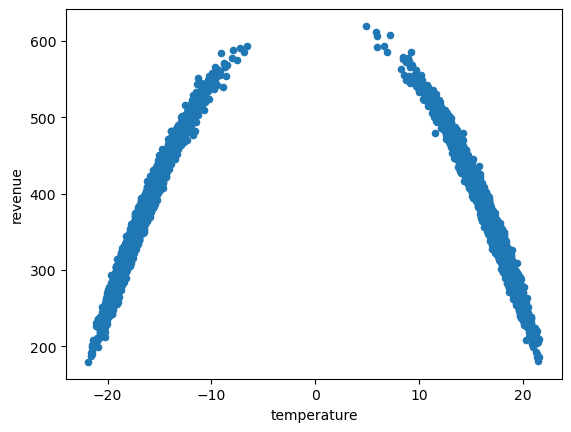

In [111]:
df.plot.scatter(x = "temperature", y = "revenue")

Now, create a new column called "temperature2" which squares the temperature. Then, re-run the scatterplot using the new column:

In [112]:
df["temperature2"] = df["temperature"] ** 2

<Axes: xlabel='temperature2', ylabel='revenue'>

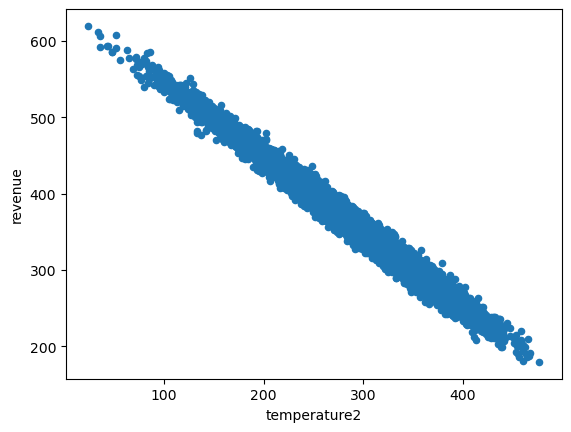

In [113]:
df.plot.scatter(x = "temperature2", y = "revenue")

***Squaring the variable is a good transformation technique when the original data shows a U-shaped curve.***

### Logging Variables
Now plot quantity (x-axis) vs. cogs (y-axis):

<Axes: xlabel='quantity', ylabel='cogs'>

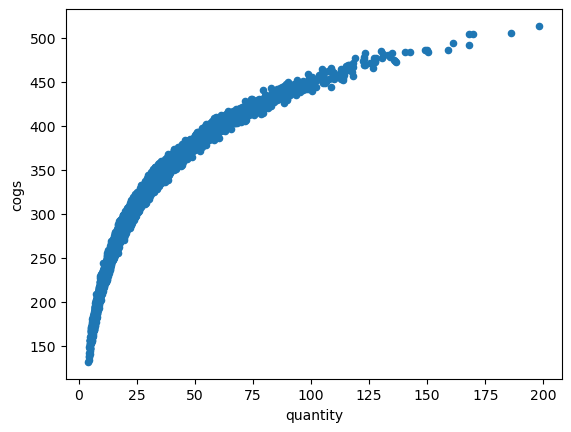

In [114]:
df.plot.scatter(x = "quantity", y = "cogs")

Here are the histograms for quantity and cogs:

<Axes: ylabel='Frequency'>

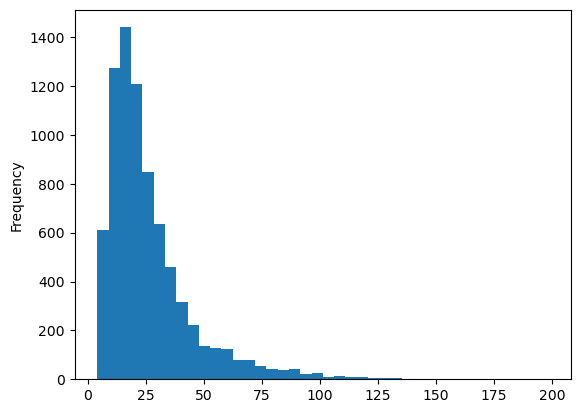

In [115]:
df["quantity"].plot.hist(bins = 40)

<Axes: ylabel='Frequency'>

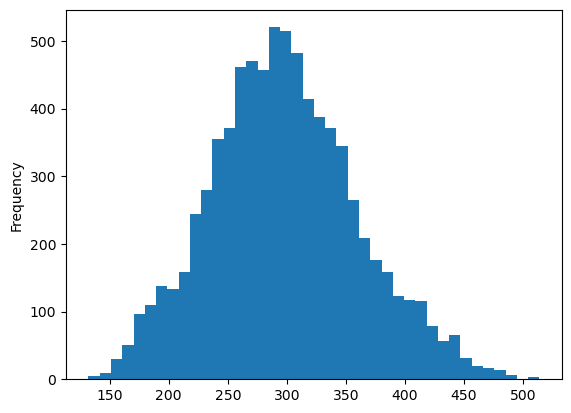

In [116]:
df["cogs"].plot.hist(bins = 40)

Notice that cogs is relatively symmetric while quantity is quite skewed. Very often, a skew in the data can lead to the type of logarithmic curve we see in the scatter plot above.

Create a new column called "quantityLog" that logs the data in that column. You can use the `log()` function from `numpy` (which we've already imported as `np`). Then, re-run the scatterplot with the new column:

In [117]:
df["quantityLog"] = np.log(df["quantity"])

<Axes: xlabel='quantityLog', ylabel='cogs'>

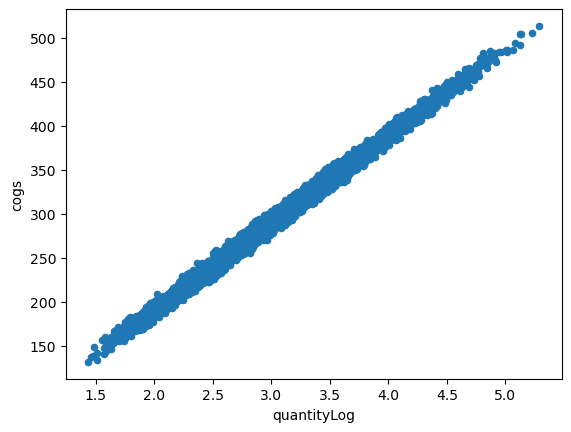

In [118]:
df.plot.scatter(x = "quantityLog", y = "cogs")

***Logging the variable is a good transformation technique when the original data shows a logarithmic curve (similar to half the U-shaped curve, although continuously increasing or decreasing). This type of curve often occurs if one of the variables is heavily skewed.***

## Interaction Features

Transformations can include more than one variable. For example: 

* Stock price alone tells us little about a company's performance. Typically we think of a price to earnings ratio
* Or we think about market cap, which is price times outstanding shares
* Absolute revenue is important, but the ratio of revenue to expenses might tell us more about efficiency

Let's look at the relationship of both revenue and cogs to market value.

First, plot revenue (x-axis) vs. marketValue (y-axis):

<Axes: xlabel='revenue', ylabel='marketValue'>

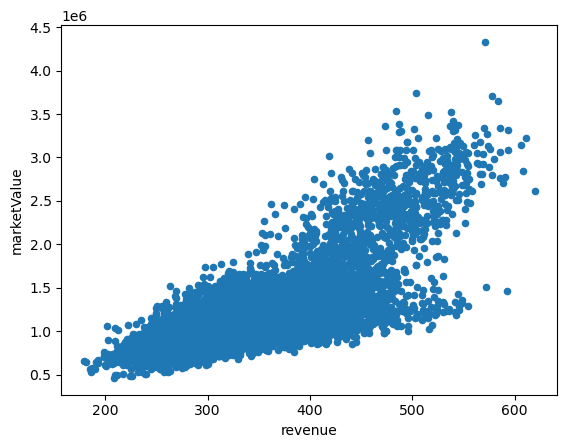

In [119]:
df.plot.scatter(x = "revenue", y = "marketValue")

Now, plot cogs (x-axis) vs. marketValue (y-axis):

<Axes: xlabel='cogs', ylabel='marketValue'>

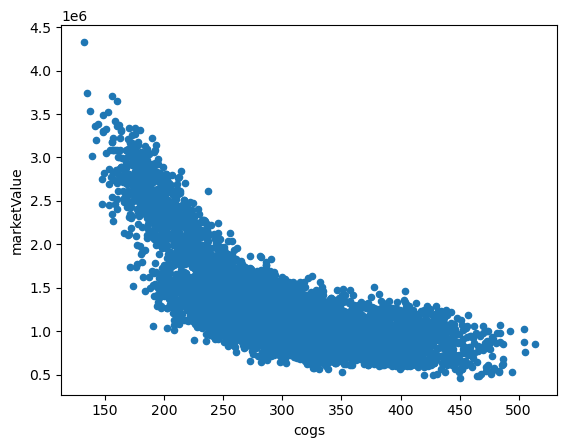

In [120]:
df.plot.scatter(x = "cogs", y = "marketValue")

Now, let's take a look at how the ratio of revenue to expenses impacts market value. First, create a new column called "cogsRatio" which is calculated as revenue divided by cogs. Then create a scatterplot of ratio (x-axis) to marketValue (y-axis):

In [121]:
df["cogsRatio"] = df["revenue"] / df["cogs"]

<Axes: xlabel='cogsRatio', ylabel='marketValue'>

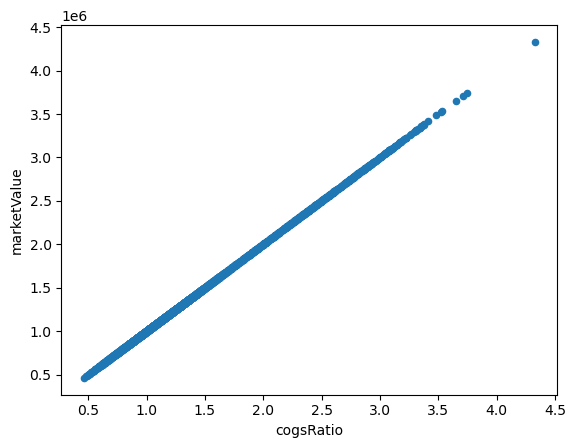

In [122]:
df.plot.scatter(x = "cogsRatio", y = "marketValue")

***Interacting 2 variables (e.g., multiplying them together or dividing them) will often create a stronger model feature than keeping the variables separate.*** Unfortunately, there is no obvious sign from the plots that you should interact 2 variables. Typically, interaction features are based on theory (or even just a hunch) that 2 variables interact with each other as they relate to a 3rd variable. If you suspect this is the case, try interacting the variables to see what happens.

## Creating New Features

### Transforming Unstructured Data
Unstructured data like text, image, audio, video, etc. require processing before we can use it in a model. 

You can get the length of a string by adding `.str.len()` to the variable as follows:

In [123]:
df["statement"].str.len()

0       61
1       81
2       49
3       53
4       51
        ..
7855    63
7856    61
7857    69
7858    61
7859    50
Name: statement, Length: 7860, dtype: int64

Add a column "statementLength" that is the length of the text in the statement and then plot statementLength (x-axis) vs. marketValue (y-axis):

In [124]:
df["statementLength"] = df["statement"].str.len()

In [125]:
df

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,marketValue,date2,weekday,month,temperature2,quantityLog,cogsRatio,statementLength
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,"Sit conubia diam vivamus a arcu dapibus in at nec, nisi amet,",1.045749e+06,2020-01-22,Wednesday,January,342.292675,2.946673,1.044657,61
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur, mauris. In, nulla sit ad himenaeos",1.388010e+06,2020-03-13,Friday,March,318.646643,2.545465,1.387166,81
2,AAPL,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at",8.378791e+05,2020-03-26,Thursday,March,350.736204,3.619995,0.836851,49
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentesque, co",9.083493e+05,2020-03-30,Monday,March,368.988092,3.397853,0.907305,53
4,AAPL,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. Sociis",8.707004e+05,2020-03-27,Friday,March,389.351632,3.033124,0.869509,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7855,WMT,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis quam himenaeos. A",1.072458e+06,2020-10-06,Tuesday,October,335.528829,3.044892,1.071514,63
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper eget vitae molli,1.049088e+06,2020-10-05,Monday,October,315.027403,3.231187,1.047959,61
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis facilisis imperdiet ut. Fac,1.174725e+06,2020-10-07,Wednesday,October,259.712511,3.389878,1.173551,69
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit lacus maximus,1.049870e+06,2020-10-20,Tuesday,October,349.091153,3.076823,1.048914,61


### Transforming Numeric Data into Categorical Data

Sometimes, you may want to categorize your numeric data into groups based on some logical condition. For example, let's say that you wanted to see how the price of stocks impacts the number of stock shares. Create a variable called "highPrice" that is `True` if the stockPrice is greater than the median and `False` otherwise. 

Hint: to get `True`/`False`, you'll need a logical statement and you can use `.median()` in your statement.

In [126]:
df["highPrice"] = df["stockPrice"] > df["stockPrice"].median()
df

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,marketValue,date2,weekday,month,temperature2,quantityLog,cogsRatio,statementLength,highPrice
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,"Sit conubia diam vivamus a arcu dapibus in at nec, nisi amet,",1.045749e+06,2020-01-22,Wednesday,January,342.292675,2.946673,1.044657,61,True
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur, mauris. In, nulla sit ad himenaeos",1.388010e+06,2020-03-13,Friday,March,318.646643,2.545465,1.387166,81,True
2,AAPL,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at",8.378791e+05,2020-03-26,Thursday,March,350.736204,3.619995,0.836851,49,False
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentesque, co",9.083493e+05,2020-03-30,Monday,March,368.988092,3.397853,0.907305,53,False
4,AAPL,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. Sociis",8.707004e+05,2020-03-27,Friday,March,389.351632,3.033124,0.869509,51,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7855,WMT,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis quam himenaeos. A",1.072458e+06,2020-10-06,Tuesday,October,335.528829,3.044892,1.071514,63,True
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper eget vitae molli,1.049088e+06,2020-10-05,Monday,October,315.027403,3.231187,1.047959,61,True
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis facilisis imperdiet ut. Fac,1.174725e+06,2020-10-07,Wednesday,October,259.712511,3.389878,1.173551,69,True
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit lacus maximus,1.049870e+06,2020-10-20,Tuesday,October,349.091153,3.076823,1.048914,61,True


Now create a side-by-side boxplot showing stockShares split by highPrice:

<Axes: title={'center': 'stockShares'}, xlabel='highPrice'>

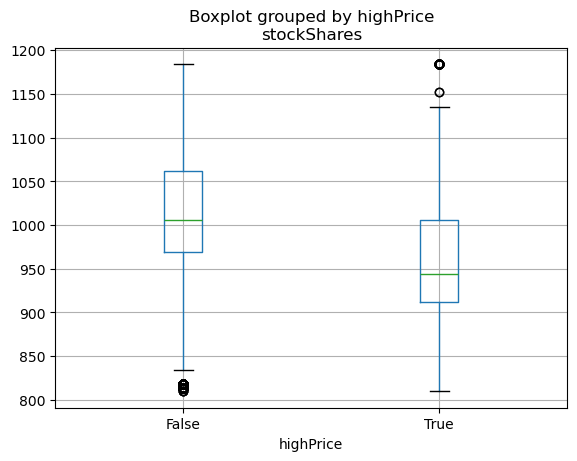

In [127]:
df.boxplot(column = "stockShares", by = "highPrice")

What if you wanted to create multiple categories? You can use the `select()` function from `numpy` as follows:

In [128]:
conditions = [(df["stockPrice"] < 1003),   # < Q1 
              (df["stockPrice"] < 1433),   # < Q3
              (df["stockPrice"] >= 1433)]  # >= Q3

labels = ["low", "mid", "high"]

df["priceCat"] = np.select(conditions, labels, default = "unknown")
df["priceCat"].value_counts()

priceCat
mid        3926
high       1971
low        1962
unknown       1
Name: count, dtype: int64

FYI, the 1 value of "unknown" is due to the fact that there was a missing value for the stockPrice column. You could use `np.nan` to change that "unknown" to a missing value as shown earlier in this worksheet.

In [129]:
df["revenuePerShare"] = df["revenue"] / df["stockShares"]

In [130]:
df["revenuePerShare"].describe()

count    7860.000000
mean        0.367020
std         0.080343
min         0.176447
25%         0.307930
50%         0.363105
75%         0.416240
max         0.702571
Name: revenuePerShare, dtype: float64

In [131]:
df.describe()

,stockShares,stockPrice,revenue,cogs,quantity,temperature,marketValue,date2,temperature2,quantityLog,cogsRatio,statementLength,revenuePerShare
count,7860.000000,7859.000000,7860.000000,7860.000000,7860.000000,7860.000000,7.859000e+03,7860,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000
mean,978.156058,1310.727666,355.452999,297.794156,26.615955,-0.343343,1.266115e+06,2020-07-01 16:45:48.091602944,294.197859,3.077044,1.265097,74.080662,0.367020
min,809.784278,476.949801,179.316987,131.986703,4.213687,-21.840318,4.633428e+05,2020-01-01 00:00:00,23.931516,1.438338,0.462284,27.000000,0.176447
25%,924.292173,1003.535640,305.754637,255.680705,14.187851,-17.459061,9.836084e+05,2020-04-01 00:00:00,251.859537,2.652386,0.982639,57.000000,0.307930
50%,976.091229,1189.870025,346.505519,294.783712,21.066767,-11.233978,1.169896e+06,2020-07-01 12:00:00,302.093725,3.047697,1.168861,68.000000,0.363105
75%,1038.403035,1433.993986,396.804068,337.477349,32.286660,17.308275,1.381114e+06,2020-10-01 00:00:00,344.113211,3.474654,1.380107,81.000000,0.416240
max,1184.148135,4526.030051,619.630921,513.715137,198.253185,21.587124,4.328946e+06,2020-12-31 00:00:00,476.999486,5.289545,4.328084,255.000000,0.702571
std,98.516888,527.668874,69.957051,62.245534,19.520975,17.149851,4.671410e+05,NaN,70.732036,0.624669,0.467114,27.518035,0.080343


In [132]:
df["revenueLog"] = np.log(df["revenue"])

In [133]:
df.describe()


,stockShares,stockPrice,revenue,cogs,quantity,temperature,marketValue,date2,temperature2,quantityLog,cogsRatio,statementLength,revenuePerShare,revenueLog
count,7860.000000,7859.000000,7860.000000,7860.000000,7860.000000,7860.000000,7.859000e+03,7860,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000
mean,978.156058,1310.727666,355.452999,297.794156,26.615955,-0.343343,1.266115e+06,2020-07-01 16:45:48.091602944,294.197859,3.077044,1.265097,74.080662,0.367020,5.854437
min,809.784278,476.949801,179.316987,131.986703,4.213687,-21.840318,4.633428e+05,2020-01-01 00:00:00,23.931516,1.438338,0.462284,27.000000,0.176447,5.189155
25%,924.292173,1003.535640,305.754637,255.680705,14.187851,-17.459061,9.836084e+05,2020-04-01 00:00:00,251.859537,2.652386,0.982639,57.000000,0.307930,5.722783
50%,976.091229,1189.870025,346.505519,294.783712,21.066767,-11.233978,1.169896e+06,2020-07-01 12:00:00,302.093725,3.047697,1.168861,68.000000,0.363105,5.847899
75%,1038.403035,1433.993986,396.804068,337.477349,32.286660,17.308275,1.381114e+06,2020-10-01 00:00:00,344.113211,3.474654,1.380107,81.000000,0.416240,5.983443
max,1184.148135,4526.030051,619.630921,513.715137,198.253185,21.587124,4.328946e+06,2020-12-31 00:00:00,476.999486,5.289545,4.328084,255.000000,0.702571,6.429124
std,98.516888,527.668874,69.957051,62.245534,19.520975,17.149851,4.671410e+05,NaN,70.732036,0.624669,0.467114,27.518035,0.080343,0.194474


In [134]:
df["revenue2"] = df["revenue"] ** 2

In [135]:
df.describe()

,stockShares,stockPrice,revenue,cogs,quantity,temperature,marketValue,date2,temperature2,quantityLog,cogsRatio,statementLength,revenuePerShare,revenueLog,revenue2
count,7860.000000,7859.000000,7860.000000,7860.000000,7860.000000,7860.000000,7.859000e+03,7860,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000
mean,978.156058,1310.727666,355.452999,297.794156,26.615955,-0.343343,1.266115e+06,2020-07-01 16:45:48.091602944,294.197859,3.077044,1.265097,74.080662,0.367020,5.854437,131240.200753
min,809.784278,476.949801,179.316987,131.986703,4.213687,-21.840318,4.633428e+05,2020-01-01 00:00:00,23.931516,1.438338,0.462284,27.000000,0.176447,5.189155,32154.581864
25%,924.292173,1003.535640,305.754637,255.680705,14.187851,-17.459061,9.836084e+05,2020-04-01 00:00:00,251.859537,2.652386,0.982639,57.000000,0.307930,5.722783,93485.897928
50%,976.091229,1189.870025,346.505519,294.783712,21.066767,-11.233978,1.169896e+06,2020-07-01 12:00:00,302.093725,3.047697,1.168861,68.000000,0.363105,5.847899,120066.074930
75%,1038.403035,1433.993986,396.804068,337.477349,32.286660,17.308275,1.381114e+06,2020-10-01 00:00:00,344.113211,3.474654,1.380107,81.000000,0.416240,5.983443,157453.468242
max,1184.148135,4526.030051,619.630921,513.715137,198.253185,21.587124,4.328946e+06,2020-12-31 00:00:00,476.999486,5.289545,4.328084,255.000000,0.702571,6.429124,383942.477858
std,98.516888,527.668874,69.957051,62.245534,19.520975,17.149851,4.671410e+05,NaN,70.732036,0.624669,0.467114,27.518035,0.080343,0.194474,52946.744219


In [136]:

# Change all the values in the temperature column to NA if the value of temperature is less than -10. What is the mean of the temperature column? (Round to 3 decimal places.)

df.loc[df["temperature"] < -10, "temperature"] = np.nan

]

In [138]:
df.describe()

,stockShares,stockPrice,revenue,cogs,quantity,temperature,marketValue,date2,temperature2,quantityLog,cogsRatio,statementLength,revenuePerShare,revenueLog,revenue2
count,7860.000000,7859.000000,7860.000000,7860.000000,7860.000000,3880.000000,7.859000e+03,7860,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000
mean,978.156058,1310.727666,355.452999,297.794156,26.615955,16.817987,1.266115e+06,2020-07-01 16:45:48.091602944,294.197859,3.077044,1.265097,74.080662,0.367020,5.854437,131240.200753
min,809.784278,476.949801,179.316987,131.986703,4.213687,-9.981447,4.633428e+05,2020-01-01 00:00:00,23.931516,1.438338,0.462284,27.000000,0.176447,5.189155,32154.581864
25%,924.292173,1003.535640,305.754637,255.680705,14.187851,15.825149,9.836084e+05,2020-04-01 00:00:00,251.859537,2.652386,0.982639,57.000000,0.307930,5.722783,93485.897928
50%,976.091229,1189.870025,346.505519,294.783712,21.066767,17.335288,1.169896e+06,2020-07-01 12:00:00,302.093725,3.047697,1.168861,68.000000,0.363105,5.847899,120066.074930
75%,1038.403035,1433.993986,396.804068,337.477349,32.286660,18.542508,1.381114e+06,2020-10-01 00:00:00,344.113211,3.474654,1.380107,81.000000,0.416240,5.983443,157453.468242
max,1184.148135,4526.030051,619.630921,513.715137,198.253185,21.587124,4.328946e+06,2020-12-31 00:00:00,476.999486,5.289545,4.328084,255.000000,0.702571,6.429124,383942.477858
std,98.516888,527.668874,69.957051,62.245534,19.520975,3.097752,4.671410e+05,NaN,70.732036,0.624669,0.467114,27.518035,0.080343,0.194474,52946.744219


In [140]:
# Add 5 to the values in the cogs column if the value in the quantity column is less than 10. What is the mean of the cogs column? (Round to 1 decimal place.)

df.loc[df["quantity"] < 10, "cogs"] += 5

In [141]:
df.describe()

,stockShares,stockPrice,revenue,cogs,quantity,temperature,marketValue,date2,temperature2,quantityLog,cogsRatio,statementLength,revenuePerShare,revenueLog,revenue2
count,7860.000000,7859.000000,7860.000000,7860.000000,7860.000000,3880.000000,7.859000e+03,7860,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000
mean,978.156058,1310.727666,355.452999,298.297337,26.615955,16.817987,1.266115e+06,2020-07-01 16:45:48.091602944,294.197859,3.077044,1.265097,74.080662,0.367020,5.854437,131240.200753
min,809.784278,476.949801,179.316987,136.986703,4.213687,-9.981447,4.633428e+05,2020-01-01 00:00:00,23.931516,1.438338,0.462284,27.000000,0.176447,5.189155,32154.581864
25%,924.292173,1003.535640,305.754637,255.680705,14.187851,15.825149,9.836084e+05,2020-04-01 00:00:00,251.859537,2.652386,0.982639,57.000000,0.307930,5.722783,93485.897928
50%,976.091229,1189.870025,346.505519,294.783712,21.066767,17.335288,1.169896e+06,2020-07-01 12:00:00,302.093725,3.047697,1.168861,68.000000,0.363105,5.847899,120066.074930
75%,1038.403035,1433.993986,396.804068,337.477349,32.286660,18.542508,1.381114e+06,2020-10-01 00:00:00,344.113211,3.474654,1.380107,81.000000,0.416240,5.983443,157453.468242
max,1184.148135,4526.030051,619.630921,513.715137,198.253185,21.587124,4.328946e+06,2020-12-31 00:00:00,476.999486,5.289545,4.328084,255.000000,0.702571,6.429124,383942.477858
std,98.516888,527.668874,69.957051,61.418815,19.520975,3.097752,4.671410e+05,NaN,70.732036,0.624669,0.467114,27.518035,0.080343,0.194474,52946.744219
